# <font color="blue">DA514 - Homework Assignment 2</font>

Assigned: February 24th, 2021<br>
Due: **March 7th, 2021 23:55pm**

Please use this notebook for your answers. Add your charts/graphs/code where necessary. You can select the "Markdown" mode from the drop-down menu above and type your answer/reasoning there. It would be extra nice if you can use equations. The notebooks we provided have numerous examples. you can also check the following link for the Markdown formula: http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/

### Requirements (very important):
1. Please use **this notebook** to answer the questions. If you work on Colab, you can download your notebook and use it for submission.


2. Please name your notebook as **`lastName_firstName_HW2.ipynb`** and upload it to SuCourse+ on time.


3. Don't send your work in HTML format. Because we must be able to run your code if need be. Don't send it in the **`.py`** format either. They won't be processed.  


4. Please work alone.

# Q1. Cross Validation and the mean model performance (30 pts)
Cross-validation gives a measure of out-of-sample accuracy by averaging over several random partitions of test samples. It is often used for parameter tuning by doing cross-validation for several possible values of a parameter and choosing the parameter value that gives the lowest cross-validation average error. So you can use CV to help choose between alternatives.

The point is, you can use one validation step only for one goal: either for parameter optimization, or for estimating generalization performance. When you use cross validation for parameter tuning, the validation samples in fact become part of your model. So you need another independent (test) sample to correctly assess the performance of the final model. When we have limited data, we may not have that independent data set to measure the generalization performance of the model.

When only a limited data is available, we use a k-fold CV and report the mean performance across all folds. With a single random partitioning of data, the result could be noisy meaning that each time the CV procedure is run, a different split of the dataset into k-folds can be implemented, and in turn, the distribution of performance scores can be different, resulting in a different mean estimate of model performance.

One alternative might be to use repeated cross validations. This way, we can have a more reliable estimate for the mean performance of the model as the repeated CV estimator outperforms the non-repeated one by reducing the variability of the estimator.

We would like to measure the mean performance of the default Logistic Regression and kNN models on the Iris data set. 

**1.** Fit the default **Logistic Regression** and **kNN** models by training on the whole data using a single 5-fold CV procedure and report the mean performance and the standard error. 

**2.** Now employ a **repeated** 5-fold CV procedure (say 50-100 repetitions) for both models to measure the overall mean performance and the standard error.

What differences do you see? You may want to plot the variation in the mean performance and the standard error as a function of the number of repetitions and comment. 

In [1]:
# Answer here
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set()

import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook

In [2]:
# load the iris data into a DataFrame from its URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' 
df = pd.read_csv(url)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
# Specify the column names:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=col_names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
seed=50
y = df.species
columns_used = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #use all attributes
X = df[columns_used]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

### 1. Fit the default Logistic Regression and kNN models

In [7]:
#I use logistic regression model with default hyperparameters
#all features have same unit therefore I do not need scaling to X_test,X_train
Clf = LogisticRegression()
Clf.fit(X_train, y_train)
predictions = Clf.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, Clf.predict(X_test))))

Test accuracy : 0.9736842105263158


In [8]:
#I used 5 fold cross validation and I learned accuracy scores of each fold 
scores = cross_val_score(Clf, X_test, y_test, cv=5, scoring='accuracy')

In [9]:
from scipy import stats

print(' MeanCV-score : ', scores.mean()) 
print(' Std Error : ', stats.sem(scores)) 

 MeanCV-score :  0.9214285714285714
 Std Error :  0.03224191086654962


I calculated mean of cross validation scores and standard error for only 5 fold with logistic regression model. However I do not know ***consistency of model performance***

### KNN

In [361]:
#I use KNN model with default hyperparameters
Clf_KNN = KNeighborsClassifier(n_neighbors = 5) 
Clf_KNN.fit(X_train, y_train)
predictions = Clf_KNN.predict(X_test)
print( 'Test accuracy :', (accuracy_score(y_test, Clf_KNN.predict(X_test))))

Test accuracy : 1.0


In [362]:
#I used 5 fold cross validation and I learned accuracy scores of each fold 
scores_Knn = cross_val_score(Clf_KNN, X_test, y_test, cv=5, scoring='accuracy')

In [363]:
print(' MeanCV-score : ', scores_Knn.mean()) 
print(' Std Error : ', stats.sem(scores_Knn)) 

 MeanCV-score :  0.975
 Std Error :  0.024999999999999998


I calculated mean of cross validation scores and standard error for only 5 fold with KNN model. However I do not know ***consistency of model performance.*** I reached same results for both these models. 

### 2.  Repeated 5-fold CV

I employed a repeated 5-fold CV procedure with ***50 repetitions for logistic regression models*** to measure the overall mean performance and the standard error.


In [364]:
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
Clf2 = LogisticRegression()
Clf2.fit(X_train, y_train)
predictions = Clf2.predict(X_test)
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
scores_reph = cross_val_score(Clf2, X_test, y_test, cv = kfold)
print(' MeanCV-score : ', scores_reph.mean()) 
print(' Std Error : ', stats.sem(scores_reph))

 MeanCV-score :  0.9606428571428571
 Std Error :  0.004608803131621104


In [365]:
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
Clf2_KNN = KNeighborsClassifier(n_neighbors = 5)
Clf2_KNN.fit(X_train, y_train)
predictions = Clf2_KNN.predict(X_test)
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)
scores_reph2 = cross_val_score(Clf2_KNN, X_test, y_test, cv = kfold)
print(' MeanCV-score : ', scores_reph2.mean()) 
print(' Std Error : ', stats.sem(scores_reph2)) 

 MeanCV-score :  0.9697142857142858
 Std Error :  0.003797287433567125


I see a ***significant difference*** in mean and standart error  between 5-fold cross validation and repeated 5-fold cross validation. This shows that the model which I built is not constant. mean accuracy changes in every repetion. I drew a plot to see the variation in the mean performance

In [366]:
#cross_val_score returns an array which has score by cross-validation. 
#I seperated to 5 folds and append to new list by this way I can calculate easily mean and standart deviation for 5 fold cross validation
new_list_log = []
for i in range(0,250,5): 
    new_list_log.append([scores_reph[i:i+5]])

new_list_knn = []
for i in range(0,250,5): 
    new_list_knn.append([scores_reph2[i:i+5]])


In [367]:
#I calculated mean and standart error. I added to a list these values
mean_list_log=[]
for i in range(len(new_list_log)):
    mean_list_log.append(np.array(new_list_log[i]).mean())

In [368]:
sem_list_log=[]
for i in range(len(new_list_log)):
    sem_list_log.append(stats.sem(np.array(new_list_log[i]), axis=None, ddof=0))

In [369]:
mean_list_knn=[]
for i in range(len(new_list_knn)):
    mean_list_knn.append(np.array(new_list_knn[i]).mean())

sem_list_knn=[]
for i in range(len(new_list_knn)):
    sem_list_knn.append(stats.sem(np.array(new_list_knn[i]), axis=None, ddof=0))    


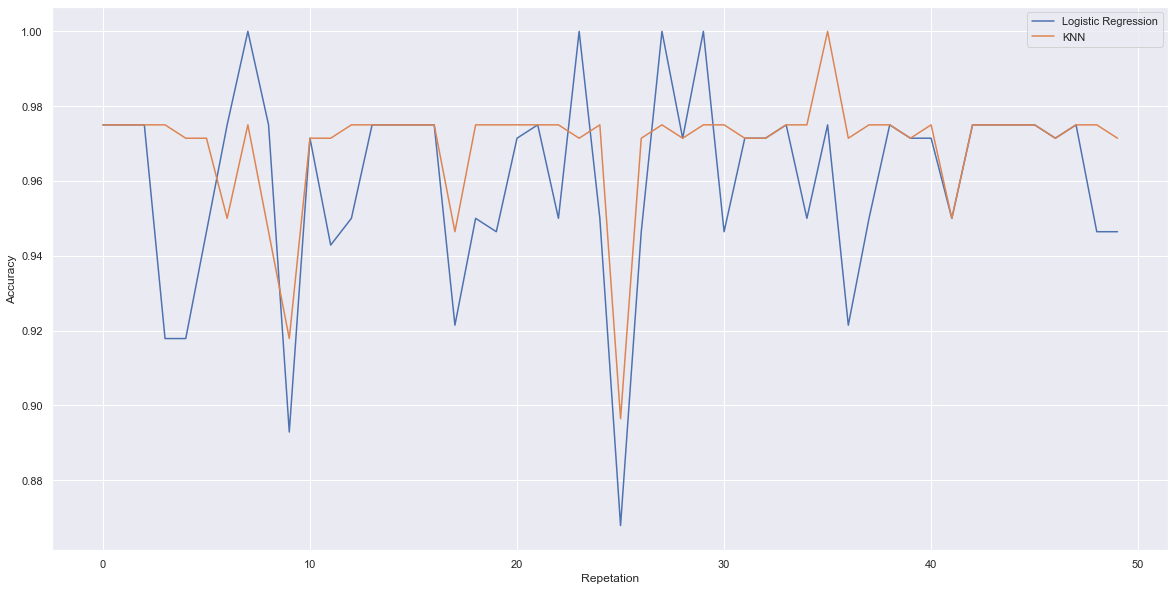

In [370]:
import scipy.stats as stats 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
mean_acc_log = np.array(mean_list_log)

plt.plot(mean_acc_log,label='Logistic Regression') 

mean_acc_knn = np.array(mean_list_knn)
plt.plot(mean_list_knn,label='KNN') 
plt.xlabel("Repetation")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

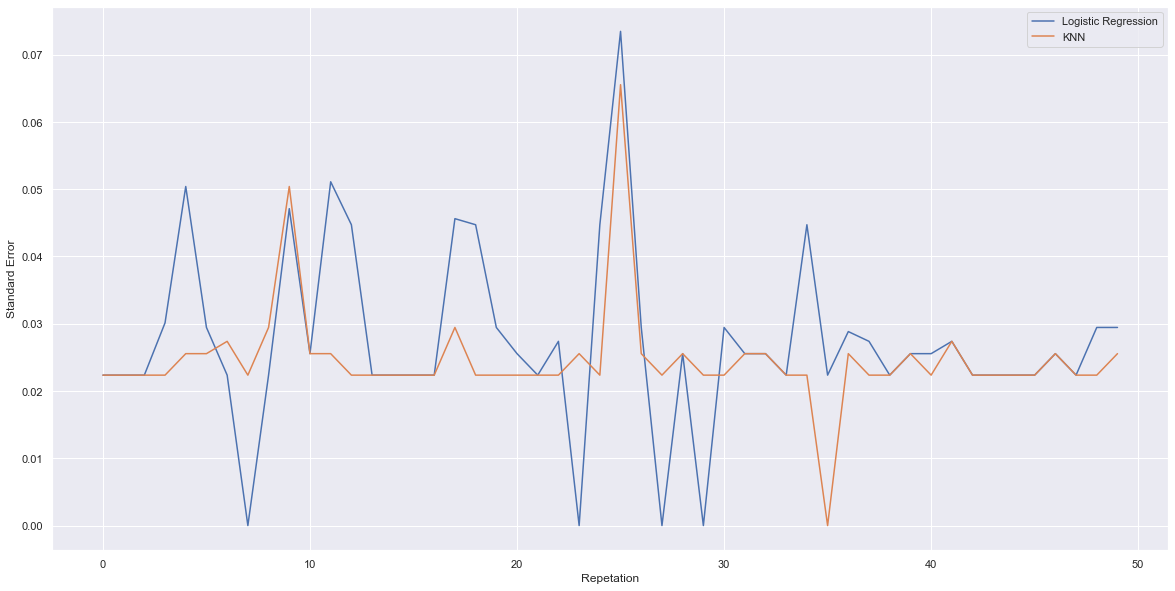

In [371]:
import scipy.stats as stats 
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))

sem_log = np.array(sem_list_log)

plt.plot(sem_log,label='Logistic Regression') 

sem_knn = np.array(sem_list_knn)
plt.plot(sem_knn,label='KNN') 
plt.xlabel("Repetation")
plt.ylabel("Standard Error")
plt.legend()
plt.show()

 Accuracy and standard error performance become more ***stable*** in both models by increasing cross validation repetation because of increase randomness

##### Hyperparameter Tuning
First of all, I used default parameters of model and I want to see performans accuracy and standart error if there is tuning hyperparameter of models. Does any change?


In [372]:
from sklearn.model_selection import StratifiedKFold, RepeatedKFold
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('classifier',   LogisticRegression(random_state=seed))])

params = [{'classifier__C'      : np.arange(0.1, 1, 0.05), 
           'classifier__penalty': ['l1'], 
           'classifier__solver' : ['liblinear', 'saga']},
          
          {'classifier__C'      : np.arange(0.1, 1, 0.05), 
           'classifier__penalty': ['l2'], 
           'classifier__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
         ]
kfold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=seed)

grid_repeated = GridSearchCV(pipeline, param_grid=params, cv=kfold, verbose=1, n_jobs=-1)

grid_repeated.fit(X_train, y_train)
print('Best grid parameters:', grid_repeated.best_params_, '\n')
print('Classifier used     :',grid_repeated.best_estimator_,'\n')
print('Grid accuracy on test data:', grid_repeated.score(X_test, y_test))

Fitting 250 folds for each of 126 candidates, totalling 31500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 2878 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 7878 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 14878 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 23878 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 31500 out of 31500 | elapsed:  2.9min finished


Best grid parameters: {'classifier__C': 0.9500000000000003, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'} 

Classifier used     : Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=0.9500000000000003, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=42,
                                    solver='newton-cg', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Grid accuracy on test data: 1.0


In [373]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([ ('scale', StandardScaler()),
                 ('clf'   , KNeighborsClassifier())])

params = [{'clf__n_neighbors': np.arange(2, 40, 2)}]


grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X_train, y_train)
print('Best model:', grid.best_params_)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))

Best model: {'clf__n_neighbors': 8}
Training accuracy: 0.9464285714285714
Test accuracy    : 1.0


In [374]:
pipe = Pipeline([ ('scale', StandardScaler()),
                 ('clf'   , KNeighborsClassifier())])

params = [{'clf__n_neighbors': np.arange(2, 40, 2)}]

kfold = RepeatedKFold(n_splits=5, n_repeats=100, random_state=seed)
grid = GridSearchCV(pipe, param_grid=params, cv=kfold)
grid.fit(X_train, y_train)
print('Best model:', grid.best_params_)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))

Best model: {'clf__n_neighbors': 4}
Training accuracy: 0.9553571428571429
Test accuracy    : 0.9736842105263158


# Q2. Are my test and train sets from the same population? (30 pts)
For answering this question, you are expected to use the data set we used for the solution of the Telco churn problem we solved in class.

Given the train (**gsmchurn_train.csv**) and test (**gsmchurn_test.csv**) data sets, you're expected to work on a classification problem for predicting churn. Having received not successful results despite all your efforts to tune the model for this specific job, you suspect that the train and test sets may not be coming from the same population. One way to check for the similarity between train and test sets could be to design a binary classification problem to shed some light on this issue.    

Imagine you mark each set (both train and test) with a special flag added as a column to these data sets indicating that they are either train or test sets. You can then combine these data sets into a single data frame and apply a classification model of your choice. If you are able to accurately classify whether the sample comes from the test or training set then the predictor variables have different underlying distributions. If not, you can safely assume that there is reasonable similarity between the train and test sets. One way to check this could be building the model and then finding the value of the probability that a randomly chosen positive example has a higher score (rank) than a randomly chosen negative example. Correct interpretation of this probability will help you come to a conclusion. 

In [375]:
# Answer here
df_train = pd.read_csv('gsmchurn_train.csv') 
df_test = pd.read_csv('gsmchurn_test.csv') 

is_train = [1,0]
df_train['train_column'] =  is_train[0]
df_test['train_column'] = is_train[1]

In [376]:
comb_df = df_train.append(df_test)
df2 = comb_df.copy()

In [377]:
from sklearn import model_selection
seed = 42 # for reproducibility
train, test = model_selection.train_test_split(df2, test_size=0.30, random_state=seed, stratify=df2['train_column'])

In [378]:
y_train = train['train_column']
X_train = train.drop('train_column', axis=1)
y_test = test['train_column']
X_test = test.drop('train_column', axis=1)
print('X_train and y_train:', X_train.shape, y_train.shape)
print('X_test and y_test  :', X_test.shape, y_test.shape)

X_train and y_train: (2333, 14) (2333,)
X_test and y_test  : (1000, 14) (1000,)


In [379]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([  ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.5s


Best grid parameters: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Training accuracy: 0.6999571367338191
Test accuracy    : 0.7


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   12.5s finished


Values of train and test accuracy are very low therefore I looked confusion matrix. In confusion matrix says that this model cannot accurately train and test data. Model predicts as 1(is_train) to all data.This means that train and test data are selected from same population therefore these data is indistinguishable

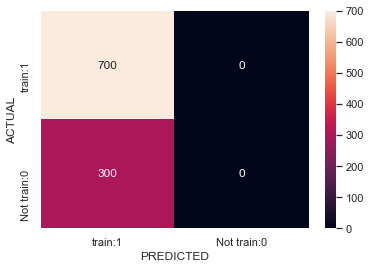


               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



In [380]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["train:1", "Not train:0"] , 
                yticklabels = ["train:1", "Not train:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

In [ ]:
#I used different metric as f(beta:2) becasue FN is more costly but there is no change, train and test data is still indistinguishable

In [381]:
from sklearn.metrics import fbeta_score, make_scorer
pipeline = Pipeline([  ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
gridcs = GridSearchCV(pipeline, param_grid = params, cv = skf, 
                      scoring=make_scorer(fbeta_score, beta=2), verbose = 1, n_jobs = -1)

gridcs.fit(X_train, y_train)

print('Best grid parameters:', gridcs.best_estimator_,'\n')
test_score = gridcs.score(X_test, y_test)
print('Training accuracy:', gridcs.score(X_train, y_train))
print('Test accuracy    :', test_score)


Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:   10.6s


Best grid parameters: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Training accuracy: 0.9210377890580936
Test accuracy    : 0.9210526315789475


[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:   12.5s finished


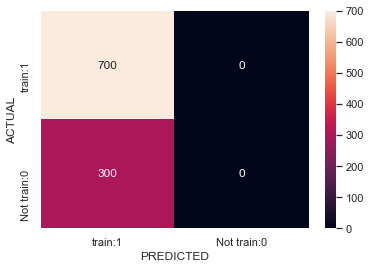


               precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000



In [382]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["train:1", "Not train:0"] , 
                yticklabels = ["train:1", "Not train:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, gridcs.predict(X_test) )
print('\n',classification_report(y_test, gridcs.predict(X_test)))

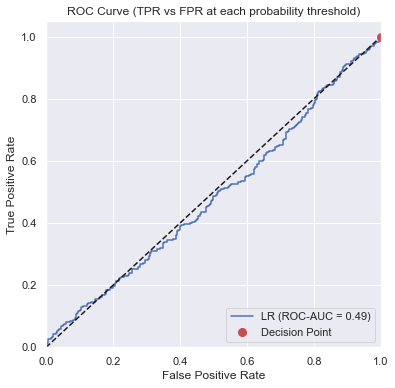

In [383]:
cm = confusion_matrix(y_test, gridcs.predict(X_test))
fpr, tpr, _ = roc_curve(y_test, gridcs.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='LR (ROC-AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
tn, fp, fn, tp = [i for i in cm.ravel()]
plt.plot(fp/(fp+tn), tp/(tp+fn), 'ro', markersize=8, label='Decision Point')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (TPR vs FPR at each probability threshold)')
plt.legend(loc="lower right")
plt.show()

# Q3. Mixed data for Naive Bayes (40 pts)

Given the following attributes:

In [390]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    'temperature':[98,87,90,86,88,79,85,89,80,90,86,83,70,68,64,69,75,75,72,81,73,68,75,76,79,77],
    'humidity'   :[85,79,91,83,87,80,86,85,87,90,83,76,88,80,65,70,80,70,90,75,74,67,73,74,77,78],
    'playtennis' :['no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes',
                   'yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes']},
    columns=['temperature', 'humidity', 'playtennis'])

The target is whether we'll play tennis given the values of temperature and humidity. The objective here is come up with a model to predict whether we shall play if **temperature=79** and **humidity=81**.

**1.** Build a Logistic Regression and a Naive Bayes model to compare the predicitons for the temperature and humidity value given above. Given the small size of our training data, you should use an **appropriate Cross-validation technique** to select a Logistic Regression model.

**2.** Transform the temperature feature (which is a continuous attribute) into a categorical one. Use the following table for this purpose:<br>

|Range|Value|
|----|-----|
|temp $\lt$ 75| Low|
|75 $\lt$ temp $\le$ 85| Medium|
|temp $\gt$ 85| High|

Now you have mixed data. Build a Naive Bayes model that can handle both features and make a prediction for (temperature=medium, humidity=81) where medium is selected for temperature =79.

One way of handling mixed data is to independently fit a GaussianNB model on the continuous part of the data and a CategoricalNB (see below for reference) model on the categorical part. 

Once you fit each model using relevant attributes, you can compute the class probabilities (for both yes and no) for both of these models by using the `predict_proba` method. These probabilities are 2D arrays for "**no/0**" and "**yes/1**" classes. By taking either one of these class assignment probabilities (say probability values for 1) for both models, you can use these as new features for continuous and categorical atributes. You can put these together by using either `numpy.c_` or `numpy.hstack` modules. Now you have continuous attributes for your data.  

Finally, you can refit a new GaussianNB model on these new features (along with the target) and make your predictions. The input for this new model will be the probabilities for "temperature=medium" and "humidity=81" which will be the predictions of the separate models built in the previous step.

Reference for Categorical NB: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

In [391]:
df['playtennis'] = df['playtennis'].map({'no' : 0, 'yes' : 1})

In [392]:
df.head()

,temperature,humidity,playtennis
0,98,85,0
1,87,79,0
2,90,91,0
3,86,83,0
4,88,87,0


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
temperature    26 non-null int64
humidity       26 non-null int64
playtennis     26 non-null int64
dtypes: int64(3)
memory usage: 752.0 bytes


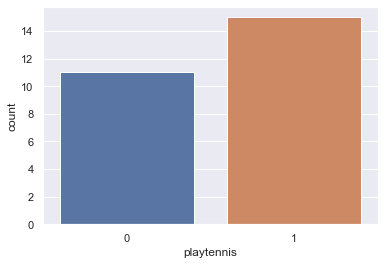

In [394]:
sns.countplot(df['playtennis'],label="Count");

In [395]:
y = df.playtennis
columns_used = ['temperature', 'humidity']
X = df[columns_used]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [396]:
#size of data is very small therefore I used leave one out cross validation.
#First of all, I used logistic regression model and tune hyperparamter

pipe = Pipeline([('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=seed))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

loocv = model_selection.LeaveOneOut()
grid = GridSearchCV(pipe, param_grid=params, cv=loocv, n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)

print('Best grid parameters:', grid.best_estimator_,'\n')
test_score = grid.score(X_test, y_test)
print('Training accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', test_score)

Fitting 19 folds for each of 266 candidates, totalling 5054 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 1499 tasks      | elapsed:   26.7s


Best grid parameters: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.15000000000000002, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='auto',
                                    n_jobs=None, penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

Training accuracy: 0.9473684210526315
Test accuracy    : 0.7142857142857143


[Parallel(n_jobs=-1)]: Done 5054 out of 5054 | elapsed:   41.2s finished


In [397]:
#Secondly I used Gaussian Naive Bayes model because all features are continuous. 

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

pipeline = Pipeline([('transformer', PowerTransformer()),
                     ('clf', GaussianNB()) ])

params = [{'clf__var_smoothing': np.logspace(0,-9, num=100)}]

loocv = model_selection.LeaveOneOut()
grid = GridSearchCV(estimator = pipeline, param_grid = params, cv = loocv,n_jobs=-1 , verbose=1)

grid.fit(X_train, y_train)
print('Best grid parameters:', grid.best_params_, '\n')
print('Classifier used     :',grid.best_estimator_,'\n')
print('Grid accuracy on test data:', grid.score(X_test, y_test))
print('Training accuracy:', grid.score(X_train, y_train))

Fitting 19 folds for each of 100 candidates, totalling 1900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:    2.8s


Best grid parameters: {'clf__var_smoothing': 1.0} 

Classifier used     : Pipeline(memory=None,
         steps=[('transformer',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('clf', GaussianNB(priors=None, var_smoothing=1.0))],
         verbose=False) 

Grid accuracy on test data: 0.8571428571428571
Training accuracy: 0.9473684210526315


[Parallel(n_jobs=-1)]: Done 1900 out of 1900 | elapsed:    8.8s finished


In [398]:
#Gaussion Naive Bayes has better accuracy than logistic regression because of small size train data 

In [399]:
grid.predict_proba([[79, 81]])  #When temperature is 79 and  humidity is 81, model predict play tennis

array([[0.47644818, 0.52355182]])

In [400]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

***3.2 Transform the temperature feature*** 

In [401]:
dfnew = df.copy()
for i in range(dfnew.shape[0]):
    if dfnew.temperature[i]< 75:
        dfnew.temperature[i]='Low'
    elif dfnew.temperature[i]>= 75 and dfnew.temperature[i]<= 85:
        dfnew.temperature[i]='Medium'
    elif dfnew.temperature[i]> 85:
        dfnew.temperature[i]='High'

In [402]:
dfnew.head()

,temperature,humidity,playtennis
0,High,85,0
1,High,79,0
2,High,91,0
3,High,83,0
4,High,87,0


Now, new dataframe has not only continuous but also categoric features.So, I have to separate these features to fit model.
I used gaussian naive bayes for numeric feature which is humidity , categorical naive bayes for categoric feature which is temperature


In [403]:
humid=dfnew[['humidity']] 
temp=dfnew[['temperature']]  
y=dfnew['playtennis'].values
#temperature has ordinal values so I used ordinal encoder before fit the model
ord_encod = OrdinalEncoder()
temp = enc.fit_transform(temp) #by this way, temp has 0,1,2 values

In [404]:
#I created a new feature which combine with numeric and categoric features ( humidity and temperature) before train test split
X=np.c_[humid, temp] # X is 2D array 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

***1.Model For Continuous Features***

In [405]:
Gaus_NB = GaussianNB()
Gaus_NB.fit(X_train[:,0:1], y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

***2.Model For Categoric Features***

In [406]:
CatGaus_NB = CategoricalNB()
CatGaus_NB.fit(X_train[:,1:2], y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

Probabilities for train and test 

In [407]:
#I fit each model using relevant attributes, I can compute the class probabilities 
# These probabilities are 2D arrays for "no/0" and "yes/1" classes.
Gaus_train_prob = Gaus_NB.predict_proba(X_train[:,0:1])
Cat_train_prob = CatGaus_NB.predict_proba(X_train[:,1:2])
Gaus_test_prob = Gaus_NB.predict_proba(X_test[:,0:1])
Cat_test_prob = CatGaus_NB.predict_proba(X_test[:,1:2])

In [408]:
# I again split data and choose class 1 ( play tennis)
X2_train = np.c_[(Gaus_train_prob[:,1], Cat_train_prob[:,1])] 
X2_test = np.c_[(Gaus_test_prob[:,1], Cat_test_prob[:,1])] 
mixed_model=GaussianNB()
mixed_model.fit(X2_train, y_train)
predict = mixed_model.predict(X2_test)
print('Model Accuracy: ', model.score(X2_test, y_test))

Model Accuracy:  1.0


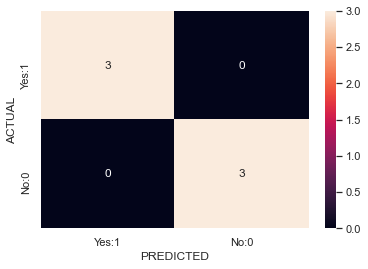


               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [409]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["Yes:1", "No:0"] , 
                yticklabels = ["Yes:1", "No:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, mixed_model.predict(X2_test) )
print('\n',classification_report(y_test, mixed_model.predict(X2_test)))

In [410]:
#the probabilities for "temperature=medium" and "humidity=81" 
mixed_model.predict_proba([[81, 1]])

array([[0., 1.]])

In [411]:
mixed_model.classes_  #when temperature is medium and humidity is 81, prediction is play tennis

array([0, 1], dtype=int64)